# Simple Neural Network

Simple Red Neuronal (Perceptrón) para la materia Tecnologías Exponenciales - TIC

Inspirado en https://github.com/jonasbostoen/simple-neural-network

### Librerias

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import networkx as nx
from random import random as rand
import itertools

In [9]:
np.random.seed(1)

### Funciones

In [10]:
#DEFINIMOS NUESTRA RED COMO UNA DE TIPO SIGMOIDE
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

# sigmoid = lambda x : 1 / ( 1 + np.exp(-x) )

def sigmoid_derivative(x):
    return x * (1 - x)

# sigmoid_derivative = lambda x : x * (1 - x)

#### Visualización Función Sigmoide

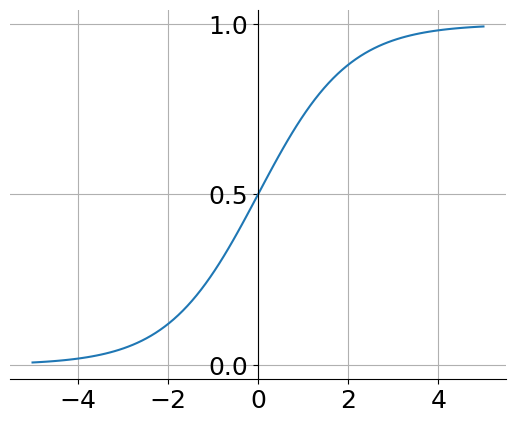

In [11]:
x = np.linspace(-5,5,100)
y = sigmoid(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x, y)
plt.locator_params(axis='y', nbins=3)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

## Setup

### Values

#### Training Values

In [12]:
#GUARDAMOS EL DATASET EN LA VARIABLE churnPre Y LO MOSTRAMOS.
#netflixtitle
churnPre = pd.read_csv("churn_prediction.csv")
churnPre = churnPre.dropna()
churnPre.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,7,1923,42,Female,0.0,self_employed,1096.0,2,1666,15202.20,...,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01
6,8,2048,72,Male,0.0,retired,1020.0,1,1,7006.93,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24


In [23]:
#CREAMOS Y MOSTRAMOS UNA NUEVA VARIABLE DONDE GUARDAMOS SOLO LOS DATOS QUE NOS SON UTILES DEL DATASET.
churnPreNew = churnPre[['age','current_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', 'current_month_credit', 'churn']]
churnPreNew

,age,current_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,churn
0,66,1458.71,1458.71,1449.07,0.20,[0]
2,31,3913.16,4910.17,2815.94,0.61,[0]
4,42,927.72,1643.31,1871.12,0.33,[1]
5,42,15202.20,15211.29,13798.82,0.36,[0]
6,72,7006.93,7859.74,11232.37,0.64,[0]
...,...,...,...,...,...,...
28377,10,1076.43,2282.19,2787.70,0.30,[0]
28378,34,3844.10,3668.83,3865.55,1.71,[0]
28379,47,65511.97,53444.81,21925.81,4666.84,[1]
28380,50,1625.55,1683.20,1857.42,0.20,[0]


In [14]:
churnPreNew

,age,gender,occupation,current_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,churn
0,66,Male,self_employed,1458.71,1458.71,1449.07,0.20,0
2,31,Male,salaried,3913.16,4910.17,2815.94,0.61,0
4,42,Male,self_employed,927.72,1643.31,1871.12,0.33,1
5,42,Female,self_employed,15202.20,15211.29,13798.82,0.36,0
6,72,Male,retired,7006.93,7859.74,11232.37,0.64,0
...,...,...,...,...,...,...,...,...
28377,10,Female,student,1076.43,2282.19,2787.70,0.30,0
28378,34,Female,self_employed,3844.10,3668.83,3865.55,1.71,0
28379,47,Male,salaried,65511.97,53444.81,21925.81,4666.84,1
28380,50,Male,self_employed,1625.55,1683.20,1857.42,0.20,0


In [26]:
#CREAMOS UNA VARIABLE DONDE GUARDAREMOS LOS DATOS DE ENTRADA DESTINADOS A TRAINING.
training_inputs: pd.DataFrame = churnPre.drop(['customer_id','vintage','gender','occupation','city','customer_nw_category','branch_code'], axis=1)
#CREAMOS OTRA VARIABLE DONDE GUARDAMOS LOS DATOS DE SALIDA, ESTA SERA LA VARIABLE A PREDECIR EN ESTE MODELO.
training_outputs: pd.Series = churnPreNew.churn
display(training_inputs)
display(training_outputs)

,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,66,0.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,[0],2019-05-21
2,31,0.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,[0],NaT
4,42,2.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,[1],2019-11-03
5,42,0.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,[0],2019-11-01
6,72,0.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,[0],2019-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,10,0.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,[0],2019-10-22
28378,34,0.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,[0],2019-12-17
28379,47,0.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,[1],2019-12-31
28380,50,3.0,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,[0],NaT


0        [0]
2        [0]
4        [1]
5        [0]
6        [0]
        ... 
28377    [0]
28378    [0]
28379    [1]
28380    [0]
28381    [1]
Name: churn, Length: 24832, dtype: object

In [27]:
#CREAMOS UNA FUNCION LLAMADA SNNModel, ESTA MISMA CONFORMA A NUESTRA RED NEURONAL SIGMOIDE.
SNNModel = lambda x, w: sigmoid(np.dot(x, w))

In [44]:
#ALMACENAMOS EN 'N' EL NUMERO DE COLUMNAS DEL DATAFRAME 'training_inputs'
#CONFIGURACIÓN DE LA RED: EN NUESTRO MODELO, 'N' REPRESENTA LA CANTIDAD DE ENTRADAS, 'M' LA CANTIDAD DE SALIDAS, Y 'SYNAPTIC_WEIGHTS' DENOTA LOS PESOS ASOCIADOS A CADA UNA DE LAS ENTRADAS.
n :int = training_inputs.shape[1]
#HACEMOS LO MISMO DE ANTES PERO AHORA CON EL DATAFRAME 'matrizGeneros' Y LO GUARDAMOS EN 'M'
m :int = training_outputs.shape[1]
#TERMINAMOS HACIENDO UNA NUEVA MATRIZ CON PESOS RANDOM Y DIMENSIONES (N, M)
synaptic_weights = 2 + np.random.random((n, m)) - 1
synaptic_weights: pd.DataFrame = synaptic_weights.astype(float)
synaptic_weights.shape
synaptic_weights

array([[1.90340192],
       [1.1374747 ],
       [1.13927635],
       [1.80739129],
       [1.39767684],
       [1.1653542 ],
       [1.92750858],
       [1.34776586],
       [1.7508121 ],
       [1.72599799],
       [1.88330609],
       [1.62367221],
       [1.75094243],
       [1.34889834]])

In [45]:
training_inputs

,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,66,0.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,[0],2019-05-21
2,31,0.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,[0],NaT
4,42,2.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,[1],2019-11-03
5,42,0.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,[0],2019-11-01
6,72,0.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,[0],2019-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,10,0.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,[0],2019-10-22
28378,34,0.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,[0],2019-12-17
28379,47,0.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,[1],2019-12-31
28380,50,3.0,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,[0],NaT


In [49]:
# TRANSFORMAMOS LAS COLUMNAS DE 'TRAINING_INPUTS' A TIPO FLOAT.
#training_inputs: pd.DataFrame = training_inputs.astype(float)


# Reemplaza 'column_name' con el nombre de las columnas que deseas convertir a tipo float
columns_to_convert = [
    'age',
    'dependents',
    'current_balance',
    'previous_month_end_balance',  # Corregir el nombre de esta columna
    'average_monthly_balance_prevQ',
    'average_monthly_balance_prevQ2',
    'current_month_credit',
    'previous_month_credit',
    'current_month_debit',
    'previous_month_debit',
    'current_month_balance',
    'previous_month_balance',
    'churn',
    'last_transaction'
]

# Itera a través de las columnas y realiza la conversión
for column_name in columns_to_convert:
    training_inputs[column_name] = pd.to_numeric(training_inputs[column_name], errors='coerce')

# Ahora solo la columna 'release_year' se convierte a tipo float


In [61]:


for iteration in range(5000):

    # Arranca con los valores de training. Es nuestra layer/capa de entrada donde llegan los datos con los que predeciremos
    input_layer = training_inputs
    # Genera un output haciendo la suma de los valores de input multiplicados por su peso sinaptico, y aplicandole la función sigmoide para normalizar a -1, 1
    outputs = SNNModel(input_layer, synaptic_weights)#(Forward propagation) Esta multiplicando las entradas por los pesos para llegar a los resultados (salidas)

    # Calculo el error
    error = training_inputs - outputs
    # Ajusto los pesos en funcion al error y al resultado obtenido (Back propagation: como dijimos antes lo que está haciendo es correr la función "de atrás para adelante", ya que está ajustando los pesos en función de la diferencia entre las salidas)
    adjustments = error * sigmoid_derivative(outputs)
    #synaptic_weights += np.dot(input_layer.T, adjustments)#Gradiente descendente: ajustamos los pesos para obtener el que menor error nos dara (óptimo local)


In [62]:
print('Synaptic weights after training')
print(synaptic_weights)

print('Outputs after training: ')
print(outputs)

Synaptic weights after training
[[1.90340192]
 [1.1374747 ]
 [1.13927635]
 [1.80739129]
 [1.39767684]
 [1.1653542 ]
 [1.92750858]
 [1.34776586]
 [1.7508121 ]
 [1.72599799]
 [1.88330609]
 [1.62367221]
 [1.75094243]
 [1.34889834]]
Outputs after training: 
[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


In [63]:
large = lambda x : display(HTML('<p style="font-size: 50px; color: #66D148">'+str(x)+'</p>'))

In [64]:
input_layer

,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,66,0.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,NaN,NaN
2,31,0.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,NaN,NaN
4,42,2.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,NaN,NaN
5,42,0.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,NaN,NaN
6,72,0.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,10,0.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,NaN,NaN
28378,34,0.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,NaN,NaN
28379,47,0.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,NaN,NaN
28380,50,3.0,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,NaN,NaN


In [65]:
training_inputs = np.array([
    [0,0,1],
    [1,1,1],
    [1,0,1],
    [0,1,1]
])

training_outputs = np.array([[0,1,1,0]]).T

display(training_inputs)
display(training_outputs)

array([[0, 0, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 1, 1]])

array([[0],
       [1],
       [1],
       [0]])

In [66]:
training_values = np.concatenate((training_inputs.T, training_outputs.T)).T
table = lambda arr : display(HTML(tabulate.tabulate(arr, tablefmt='html')))
table(training_values)

0,0,1,0
1,1,1,1
1,0,1,1
0,1,1,0


#### Synaptic weights

In [67]:
n = training_inputs.shape[1]
synaptic_weights = 2 + np.random.random((3, 1)) - 1

synaptic_weights

array([[1.26992789],
       [1.89588622],
       [1.42809119]])

## Training

Para obtener un resultado a partir de los inputs y los synaptic weights se realiza la siguiente función:

$$\sum_{i=0}^{n}{x_iw_i}$$

Y se le aplica la función sigmoide para normalizar al rango 0, 1

Por ejemplo, si nuestros inputs $x_i$ son `[1, 1, 1]` y nuestros pesos sinapticos $w_i$ son `[[11.30926442], [-0.20511667], [-5.4500033]]`

Nos resulta la cuenta
$$[1 \times 11.30926442] + [1 \times (-0.20511667)] + [1 \times (-5.4500033)] = 5.6541444499999995$$

Con la función sigmoide es facil ver como $$\operatorname{sigmoid}(5.65) \approx 1$$

In [68]:
eval_NN = lambda x, w: sigmoid(np.dot(x, w))

In [69]:
# 50000 epochs
for iteration in range(5000):

    # Arranca con los valores de training. Es nuestra layer/capa de entrada donde llegan los datos con los que predeciremos
    input_layer = training_inputs
    # Genera un output haciendo la suma de los valores de input multiplicados por su peso sinaptico, y aplicandole la función sigmoide para normalizar a -1, 1
    outputs = eval_NN(input_layer, synaptic_weights)#(Forward propagation) Esta multiplicando las entradas por los pesos para llegar a los resultados (salidas)

    # Calculo el error
    error = training_inputs - outputs

    # Ajusto los pesos en funcion al error y al resultado obtenido (Back propagation: como dijimos antes lo que está haciendo es correr la función "de atrás para adelante", ya que está ajustando los pesos en función de la diferencia entre las salidas)
    adjustments = error * sigmoid_derivative(outputs)
    #synaptic_weights += np.dot(input_layer.T, adjustments)#Gradiente descendente: ajustamos los pesos para obtener el que menor error nos dara (óptimo local)

In [70]:
print('Synaptic weights after training')
print(synaptic_weights)

print('Outputs after training: ')
print(outputs)

Synaptic weights after training
[[1.26992789]
 [1.89588622]
 [1.42809119]]
Outputs after training: 
[[0.80660373]
 [0.98998797]
 [0.93690965]
 [0.96524228]]


## Eval

In [71]:
table(training_values)

0,0,1,0
1,1,1,1
1,0,1,1
0,1,1,0


In [72]:
large = lambda x : display(HTML('<p style="font-size: 50px; color: #66D148">'+str(x)+'</p>'))

In [73]:
a = 1 #@param {type:"integer"}
c = 1 #@param {type:"integer"}
b = 1 #@param {type:"integer"}

input_layer = np.array([a, b, c])
res = sigmoid(np.dot(input_layer, synaptic_weights))[0]
display(res)

thresh = 0.01
out = 0 if res < thresh else 1

large(out)

0.9899879687933594

In [74]:
input_layer

array([1, 1, 1])

In [85]:


a = 1 #@param {type:"integer"}
c = 1 #@param {type:"integer"}
b = 1 #@param {type:"integer"}
d = 1 #@param {type:"integer"}
e = 1 #@param {type:"integer"}
f = 1 #@param {type:"integer"}

input_layer = np.array([a, b, c, d, e, f])
res = sigmoid(np.dot(input_layer, synaptic_weights))[0]
display(res)

thresh = 0.01
out = 0 if res < thresh else 1

large(out)

ValueError: shapes (1,6) and (3,) not aligned: 6 (dim 1) != 3 (dim 0)

### Graph

ValueError: 'c' argument has 6 elements, which is inconsistent with 'x' and 'y' with size 4.

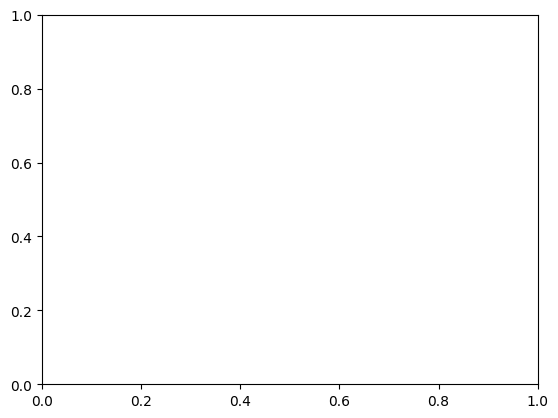

In [76]:
G = nx.DiGraph()
layers = [[0, 1, 2], [3]]

rels = list(itertools.product(*layers))
#rels.append((3, 4))
flatten = lambda l: [x for i in l for x in i]

labels = {i: v for i, v in enumerate(input_layer)}
labels[3] = round(res, 3)
#labels[4] = 0 if res < thresh else 1

pos = {}
m = max([len(l) for l in layers])
for i, l in enumerate(layers):
  for j, v in enumerate(l):
    pos[v] = (i, len(l) - j)

pos[3] = (pos[3][0], pos[1][1])
#pos[4] = (pos[3][0] + 1, pos[1][1])

weights_labels = {(ra, rb): "{:0.3f}".format(synaptic_weights[i][0]) for i, (ra, rb) in enumerate(rels)}
G.add_edges_from(rels)

options = {
    "font_size": 16,
    "node_size": 3000,
    "node_color": [(1, 1, 1, 1) for _ in range(len(labels))],
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "labels": labels,
    "connectionstyle": "arc3, rad=0",
}

nx.draw_networkx(G, pos, **options)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=weights_labels,
    font_color='black',
    font_size=16,
    font_weight='bold'
)

plt.axis('off')
ax = plt.gca()
ax.margins(0.20)
plt.show()